## K-Means聚类¶
前面几章我们介绍了监督学习，包括从带标签的数据中学习的回归和分类算法。本章，我们讨论无监督学习算法，聚类（clustering）。聚类是用于找出不带标签数据的相似性的算法。我们将介绍K-Means聚类思想，解决一个图像压缩问题，然后对算法的效果进行评估。最后，我们把聚类和分类算法组合起来，解决一个半监督学习问题。

在第一章，机器学习基础中，我们介绍过非监督学习的目的是从不带标签的训练数据中挖掘隐含的关系。聚类，或称为聚类分析（cluster analysis）是一种分组观察的方法，将更具相似性的样本归为一组，或一类（cluster），同组中的样本比其他组的样本更相似。与监督学习方法一样，我们用n维向量表示一个观测值。例如，假设你的训练数据如下图所示：

#### 聚类通常用于探索数据集。社交网络可以用聚类算法识别社区，然后向没有加入社区的用户进行推荐。在生物学领域，聚类用于找出有相似模式的基因组。推荐系统有时也利用聚类算法向用户推荐产品和媒体资源。在市场调查中，聚类算法用来做用户分组。下面，我们就用K-Means聚类算法来为一个数据集聚类。

### K-Means聚类算法简介¶
由于具有出色的速度和良好的可扩展性，K-Means聚类算法算得上是最著名的聚类方法。K-Means算法是一个重复移动类中心点的过程，把类的中心点，也称重心（centroids），移动到其包含成员的平均位置，然后重新划分其内部成员。 KK 是算法计算出的超参数，表示类的数量；K-Means可以自动分配样本到不同的类，但是不能决定究竟要分几个类。 KK 必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。例如，一个鞋厂有三种新款式，它想知道每种新款式都有哪些潜在客户，于是它调研客户，然后从数据里找出三类。也有一些问题没有指定聚类的数量，最优的聚类数量是不确定的。后面我们会介绍一种启发式方法来估计最优聚类数量，称为肘部法则（Elbow Method）。

K-Means的参数是类的重心位置和其内部观测值的位置。与广义线性模型和决策树类似，K-Means参数的最优解也是以成本函数最小化为目标。K-Means成本函数公式如下：

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

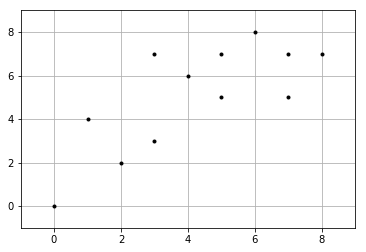

In [5]:
import numpy as np
X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.')

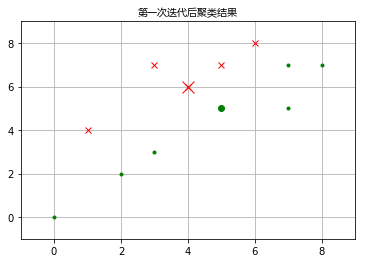

In [6]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第一次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0)

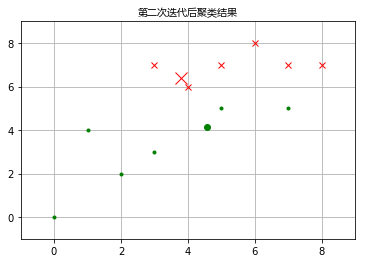

In [7]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第二次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

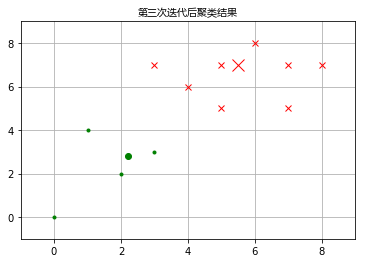

In [8]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('第三次迭代后聚类结果',fontproperties=font)
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0)

### 再重复上面的方法就会发现类的重心不变了，K-Means会在条件满足的时候停止重复聚类过程。通常，条件是前后两次迭代的成本函数值的差达到了限定值，或者是前后两次迭代的重心位置变化达到了限定值。如果这些停止条件足够小，K-Means就能找到最优解。不过这个最优解不一定是全局最优解。

局部最优解
前面介绍过K-Means的初始重心位置是随机选择的。有时，如果运气不好，随机选择的重心会导致K-Means陷入局部最优解。例如，K-Means初始重心位置如下图所示：

### 肘部法则¶
如果问题中没有指定 KK 的值，可以通过肘部法则这一技术来估计聚类数量。肘部法则会把不同 KK 值的成本函数值画出来。随着 KK 值的增大，平均畸变程度会减小；每个类包含的样本数会减少，于是样本离其重心会更近。但是，随着 KK 值继续增大，平均畸变程度的改善效果会不断减低。 KK 值增大过程中，畸变程度的改善效果下降幅度最大的位置对应的 KK 值就是肘部。下面让我们用肘部法则来确定最佳的 KK 值。下图数据明显可分成两类：

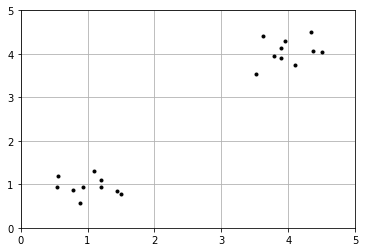

In [9]:
import numpy as np
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
plt.figure()
plt.axis([0, 5, 0, 5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

## 我们计算 KK 值从1到10对应的平均畸变程度：

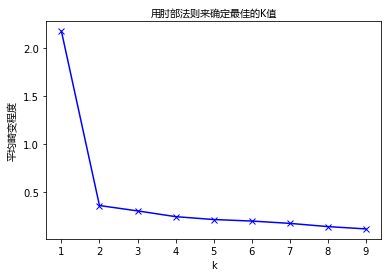

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度',fontproperties=font)
plt.title('用肘部法则来确定最佳的K值',fontproperties=font)

### 从图中可以看出， KK 值从1到2时，平均畸变程度变化最大。超过2以后，平均畸变程度变化显著降低。因此肘部就是 K=2K=2 。下面我们再用肘部法则来确定3个类的最佳的K值：

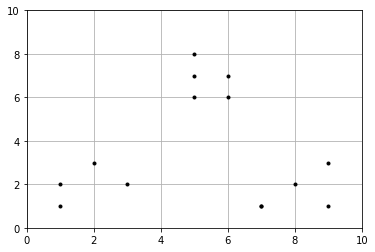

In [12]:
import numpy as np
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.figure()
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

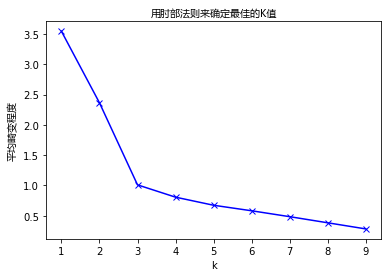

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('平均畸变程度',fontproperties=font)
plt.title('用肘部法则来确定最佳的K值',fontproperties=font)

## 从图中可以看出， KK 值从1到3时，平均畸变程度变化最大。超过3以后，平均畸变程度变化显著降低。因此肘部就是 K=3K=3 。

聚类效果评估
我们把机器学习定义为对系统的设计和学习，通过对经验数据的学习，将任务效果的不断改善作为一个度量标准。K-Means是一种非监督学习，没有标签和其他信息来比较聚类结果。但是，我们还是有一些指标可以评估算法的性能。我们已经介绍过类的畸变程度的度量方法。本节为将介绍另一种聚类算法效果评估方法称为轮廓系数（Silhouette Coefficient）。轮廓系数是类的密集与分散程度的评价指标。它会随着类的规模增大而增大。彼此相距很远，本身很密集的类，其轮廓系数较大，彼此集中，本身很大的类，其轮廓系数较小。轮廓系数是通过所有样本计算出来的，计算每个样本分数的均值，计算公式如下：

s=ba/max(a,b)

aa 是每一个类中样本彼此距离的均值， bb 是一个类中样本与其最近的那个类的所有样本的距离的均值。下面的例子运行四次K-Means，从一个数据集中分别创建2，3，4，8个类，然后分别计算它们的轮廓系数。

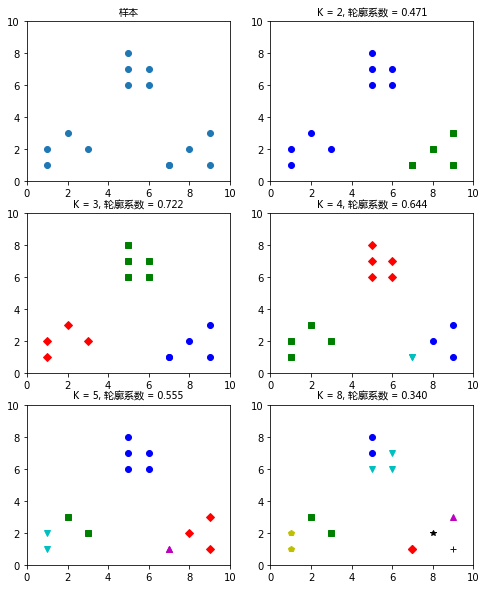

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

plt.figure(figsize=(8, 10)) 
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('样本',fontproperties=font)
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, 轮廓系数 = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean')),fontproperties=font)

### 很显然，这个数据集包括三个类。在 K=3K=3 的时候轮廓系数是最大的。在 K=8K=8 的时候，每个类的样本不仅彼此很接近，而且与其他类的样本也非常接近，因此这时轮廓系数是最小的。

### 图像量化¶
前面我们用聚类算法探索了结构化数据集。现在我们用它来解决一个新问题。图像量化（image quantization）是一种将图像中相似颜色替换成同样颜色的有损压缩方法。图像量化会减少图像的存储空间，由于表示不同颜色的字节减少了。下面的例子中，我们将用聚类方法从一张图片中找出包含图片大多数颜色的压缩颜色调色板（palette），然后我们用这个压缩颜色调色板重新生成图片。这个例子需要用mahotas图像处理库，可以通过pip install mahotas安装：

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

In [16]:
# 首先，读入图片，然后将图片矩阵展开成一个行向量。
original_img = np.array(mh.imread('feifeil.png'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

### 然后我们用K-Means算法在随机选择1000个颜色样本中建立64个类。每个类都可能是压缩调色板中的一种颜色

In [17]:
#然后我们用K-Means算法在随机选择1000个颜色样本中建立64个类。每个类都可能是压缩调色板中的一种颜色
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
# 之后，我们为原始图片的每个像素进行类的分配。
cluster_assignments = estimator.predict(image_flattened)

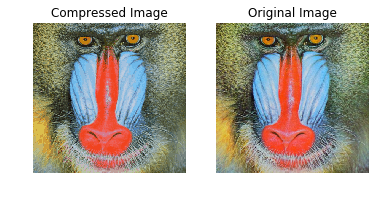

In [19]:
# 最后，我们建立通过压缩调色板和类分配结果创建压缩后的图片：
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

## 通过聚类学习特征¶
在下面的例子中，我们将聚类和分类组合起来研究一个半监督学习问题。你将对不带标签的数据进行聚类，获得一些特征，然后用这些特征来建立一个监督方法分类器。

假设你有一只猫和一条狗。再假设你买了一个智能手机，表面上看是用来给人打电话的，其实你只是用来给猫和狗拍照。你的照片拍得很棒，因此你觉得你的朋友和同事一定会喜欢它们。而你知道一部分人只想看猫的照片，一部分人只想看狗的照片，但是要把这些照片分类太麻烦了。下面我们就做一个半监督学习系统来分别猫和狗的照片。

回想一下第三章，特征抽取与处理的内容，有一个原始的方法来给图片分类，是用图片的像素密度值或亮度值作为解释变量。和我们前面进行文本处理时的高维向量不同，图片的特征向量不是稀疏的。另外，这个方法对图片的亮度，尺寸，旋转的变化都十分敏感。在第三章，特征抽取与处理里面，我们还介绍了SIFT和SURF描述器，用来描述图片的兴趣点，这类方法对图片的亮度，尺寸，旋转变化都不敏感。在下面的例子中，我们将用聚类算法处理这些描述器来学习图片的特征。每个元素将被编码成从图片中抽取的，被分配到同一个类的描述器的数量。这种方法有时也称为视觉词袋（bag-of-features）表示法，由于这个类的集合与词袋模型里的词汇表类似。我们将使用Kaggle's Dogs vs. Cats competition里面的1000张猫图片和1000张狗图片数据。注意，图片有不同的尺寸；由于我们的特征向量不用像素表示，所有我们也不需要将所有图片都缩放成同样的尺寸。我们将训练其中60的图片，然后用剩下的40图片来测试：

In [20]:
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob

###  首先，我们加载图片，转换成灰度图，再抽取SURF描述器。SURF描述器与其他类似的特征相比，可以更快的被提取，但是从2000张图片中抽取描述器依然是很费时间的。

In [21]:
all_instance_filenames = []
all_instance_targets = []
for f in glob.glob('cats-and-dogs-img/*.jpg'):
    target = 1 if 'cat' in f else 0
    all_instance_filenames.append(f)
    all_instance_targets.append(target)
surf_features = []
counter = 0
for f in all_instance_filenames:
    print('Reading image:', f)
    image = mh.imread(f, as_grey=True)
    surf_features.append(surf.surf(image)[:, 5:])
    
train_len = int(len(all_instance_filenames) * .60)
X_train_surf_features = np.concatenate(surf_features[:train_len])
X_test_surf_feautres = np.concatenate(surf_features[train_len:])
y_train = all_instance_targets[:train_len]
y_test = all_instance_targets[train_len:]

ValueError: need at least one array to concatenate

#### 然后我们把抽取的描述器分成300个类。用MiniBatchKMeans类实现，它是K-Means算法的变种，每次迭代都随机抽取样本。由于每次迭代它只计算这些被随机抽取的一小部分样本与重心的距离，因此MiniBatchKMeans可以更快的聚类，但是它的畸变程度会更大。实际上，计算结果差不多：

In [22]:
n_clusters = 300
print('Clustering', len(X_train_surf_features), 'features')
estimator = MiniBatchKMeans(n_clusters=n_clusters)
estimator.fit_transform(X_train_surf_features)

NameError: name 'X_train_surf_features' is not defined

### 之后我们为训练集和测试集构建特征向量。我们找出每一个SURF描述器的类，用Numpy的binCount()进行计数。下面的代码为每个样本生成一个300维的特征向量：

In [ ]:
X_train = []
for instance in surf_features[:train_len]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
    features = np.append(features, np.zeros((1, n_clusterslen(features))))
    X_train.append(features)
    
X_test = []
for instance in surf_features[train_len:]:
    clusters = estimator.predict(instance)
    features = np.bincount(clusters)
    if len(features) < n_clusters:
    features = np.append(features, np.zeros((1, n_clusterslen(features))))
    X_test.append(features)

#### 最后，我们在特征向量和目标上训练一个逻辑回归分类器，然后估计它的精确率，召回率和准确率：

In [ ]:
clf = LogisticRegression(C=0.001, penalty='l2')
clf.fit_transform(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

半监督学习系统仅仅使用像素密度作为特征向量，就获得了比逻辑回归分类器更好的精确率和召回率。而且，我们的特征向量只有300维，比100x100像素图片的10000维要小得多。

总结
本章，我们介绍了我们的第一个无监督学习方法：聚类。聚类是用来探索无标签数据的结构的。我们介绍了K-Means聚类算法，重复将样本分配的类里面，不断的更新类的重心位置。虽然K-Means是无监督学习方法，其效果依然是可以度量的；用畸变程度和轮廓系数可以评估聚类效果。我们用K-Means研究了两个问题。第一个问题是图像量化，一种用单一颜色表示一组相似颜色的图像压缩技术。我们还用K-Means研究了半监督图像分类问题的特征。

下一章，我们将介绍另一种无监督学习任务——降维（dimensionality reduction）。和我们前面介绍过的半监督猫和狗图像分类问题类似，降维算法可以在尽量保留信息完整性的同时，降低解释变量集合的维度。